## Nutration Risk Prediction & Recommandations

### 1) Data Collection
- Dataset Source - https://drive.google.com/file/d/1jrOQdg4fjLljNFnLxAbMouav4s1WzJxa/view?usp=drive_link

### 1.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from imblearn.over_sampling import SMOTE

#### Import the CSV Data as Pandas DataFrame

In [2]:
nutrition_df = pd.read_csv('../../data/NutrationParameters.csv')

#### Shape of the Dataset

In [3]:
nutrition_df.shape

(697, 13)

#### Head of the Dataset

In [4]:
nutrition_df.head()

,Id,Age,Gender,Height,Weight,Carbohydrate Consumption,Protein Intake,Fat Intake,Regularity of Meals,Portion Control,\nHydration,Caloric Balance,Sugar Consumption
0,1,24,Male,167.0,50.0,2,1,Healthy fats,Yes,1,2,NaN,1
1,2,30,Male,164.0,60.0,3,1,Healthy fats,No,2,3,NaN,2
2,3,24,Male,165.0,55.0,1,2,Healthy fats,No,1,1,NaN,1
3,4,28,Female,153.0,48.0,3,3,Healthy fats,No,2,2,NaN,1
4,5,24,Female,163.0,56.0,2,1,Healthy fats,Yes,3,5,1500,2


### 1.2 Dataset information


### 2. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 2.1 Check Missing values

In [5]:
nutrition_df.isna().sum()

Id                            0
Age                           0
Gender                        0
Height                        0
Weight                        0
Carbohydrate Consumption      0
Protein Intake                0
Fat Intake                    8
Regularity of Meals           0
Portion Control               0
  \nHydration                 0
Caloric Balance             172
Sugar Consumption             0
dtype: int64

#### Rename Colums

In [6]:

# Clean all column names
nutrition_df.columns = nutrition_df.columns.str.strip()                     # Removes leading/trailing spaces and \n
nutrition_df.columns = nutrition_df.columns.str.replace('\n', '', regex=True)  # Removes newlines
nutrition_df.columns = nutrition_df.columns.str.replace(' ', '_')           # Optional: Replace spaces with underscores

nutrition_df.rename(columns={
    'Carbohydrate Consumption ': 'Carbohydrate_Consumption ',
    'Protein Intake': 'Protein_Intake',
    'Fat Intake': 'Fat_Intake',
    'Regularity of Meals': 'Regularity_of_Meals',
    'Portion Control': 'Portion_Control',
    'Hydration':'Hydration',
    'Caloric Balance':'Caloric_Balance',
    'Sugar Consumption':'Sugar_Consumption'
}, inplace=True)
nutrition_df.head()

,Id,Age,Gender,Height,Weight,Carbohydrate_Consumption,Protein_Intake,Fat_Intake,Regularity_of_Meals,Portion_Control,Hydration,Caloric_Balance,Sugar_Consumption
0,1,24,Male,167.0,50.0,2,1,Healthy fats,Yes,1,2,NaN,1
1,2,30,Male,164.0,60.0,3,1,Healthy fats,No,2,3,NaN,2
2,3,24,Male,165.0,55.0,1,2,Healthy fats,No,1,1,NaN,1
3,4,28,Female,153.0,48.0,3,3,Healthy fats,No,2,2,NaN,1
4,5,24,Female,163.0,56.0,2,1,Healthy fats,Yes,3,5,1500,2


In [7]:
binary_columns = ["Regularity_of_Meals"]
for col in binary_columns:
    nutrition_df[col] = nutrition_df[col].map({"Yes": 1, "No": 0})

nutrition_df["Gender"] = nutrition_df["Gender"].map({"Male": 1, "Female": 0})
nutrition_df["Fat_Intake"] = nutrition_df["Fat_Intake"].map({"Healthy fats": 1, "UnHealthy fats": 0})
nutrition_df.head

<bound method NDFrame.head of       Id  Age  Gender  Height  Weight  Carbohydrate_Consumption  \
0      1   24       1   167.0    50.0                         2   
1      2   30       1   164.0    60.0                         3   
2      3   24       1   165.0    55.0                         1   
3      4   28       0   153.0    48.0                         3   
4      5   24       0   163.0    56.0                         2   
..   ...  ...     ...     ...     ...                       ...   
692  693   42       1   178.0    85.3                         5   
693  694   27       1   174.0    70.0                         3   
694  695   45       1   177.0    84.2                         3   
695  696   26       1   166.3    64.0                         1   
696  697   38       1   178.0    83.0                         4   

     Protein_Intake  Fat_Intake  Regularity_of_Meals  Portion_Control  \
0                 1         1.0                    1                1   
1                 1

#### Check the Duplicates

In [8]:
nutrition_df.duplicated().sum()

0

### Check data types


In [9]:
nutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        697 non-null    int64  
 1   Age                       697 non-null    int64  
 2   Gender                    697 non-null    int64  
 3   Height                    697 non-null    float64
 4   Weight                    697 non-null    float64
 5   Carbohydrate_Consumption  697 non-null    int64  
 6   Protein_Intake            697 non-null    int64  
 7   Fat_Intake                359 non-null    float64
 8   Regularity_of_Meals       697 non-null    int64  
 9   Portion_Control           697 non-null    int64  
 10  Hydration                 697 non-null    int64  
 11  Caloric_Balance           525 non-null    object 
 12  Sugar_Consumption         697 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 70.9+ KB


### 3.4 Checking the number of unique values of each column

In [10]:
nutrition_df.nunique()

Id                          697
Age                          31
Gender                        2
Height                       58
Weight                       89
Carbohydrate_Consumption      5
Protein_Intake                5
Fat_Intake                    1
Regularity_of_Meals           2
Portion_Control               5
Hydration                     6
Caloric_Balance             170
Sugar_Consumption             5
dtype: int64

In [11]:
nutrition_df.head()

,Id,Age,Gender,Height,Weight,Carbohydrate_Consumption,Protein_Intake,Fat_Intake,Regularity_of_Meals,Portion_Control,Hydration,Caloric_Balance,Sugar_Consumption
0,1,24,1,167.0,50.0,2,1,1.0,1,1,2,NaN,1
1,2,30,1,164.0,60.0,3,1,1.0,0,2,3,NaN,2
2,3,24,1,165.0,55.0,1,2,1.0,0,1,1,NaN,1
3,4,28,0,153.0,48.0,3,3,1.0,0,2,2,NaN,1
4,5,24,0,163.0,56.0,2,1,1.0,1,3,5,1500,2


#### Drop irrelevant Colums

In [12]:
nutrition_df.drop(columns=["Id",], inplace=True)

#### Calculate BMI

In [13]:
nutrition_df["BMI"] = nutrition_df["Weight"] / (nutrition_df["Height"] / 100) ** 2

In [14]:
nutrition_df.to_csv("../../data/preproccedData/Augmented_PreProccedNutrationParameters.csv", index=False)

In [15]:
nutrition_df

,Age,Gender,Height,Weight,Carbohydrate_Consumption,Protein_Intake,Fat_Intake,Regularity_of_Meals,Portion_Control,Hydration,Caloric_Balance,Sugar_Consumption,BMI
0,24,1,167.0,50.0,2,1,1.0,1,1,2,NaN,1,17.928215
1,30,1,164.0,60.0,3,1,1.0,0,2,3,NaN,2,22.308150
2,24,1,165.0,55.0,1,2,1.0,0,1,1,NaN,1,20.202020
3,28,0,153.0,48.0,3,3,1.0,0,2,2,NaN,1,20.504934
4,24,0,163.0,56.0,2,1,1.0,1,3,5,1500,2,21.077195
...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,42,1,178.0,85.3,5,3,1.0,1,3,3,-,2,26.922106
693,27,1,174.0,70.0,3,4,NaN,0,3,4,NaN,3,23.120624
694,45,1,177.0,84.2,3,4,1.0,0,3,2,2500,1,26.876057
695,26,1,166.3,64.0,1,3,1.0,1,3,4,NaN,1,23.141712


In [16]:
nutrition_df.head()

,Age,Gender,Height,Weight,Carbohydrate_Consumption,Protein_Intake,Fat_Intake,Regularity_of_Meals,Portion_Control,Hydration,Caloric_Balance,Sugar_Consumption,BMI
0,24,1,167.0,50.0,2,1,1.0,1,1,2,NaN,1,17.928215
1,30,1,164.0,60.0,3,1,1.0,0,2,3,NaN,2,22.308150
2,24,1,165.0,55.0,1,2,1.0,0,1,1,NaN,1,20.202020
3,28,0,153.0,48.0,3,3,1.0,0,2,2,NaN,1,20.504934
4,24,0,163.0,56.0,2,1,1.0,1,3,5,1500,2,21.077195


In [17]:
diabetic_risk_df=pd.read_csv('../../data/preproccedData/PreProccedWithoutAugmented/PreProccedCommonParameters.csv')

In [18]:
diabetic_risk_df.nunique()

Age                          31
Gender                        2
Height                       58
Weight                       89
Waist_Circumference          30
Diet_Food_Habits             10
Family_History                1
Blood_Pressure                2
Cholesterol_Lipid_Levels      2
Thirst                        1
Fatigue                       1
Urination                     1
Vision Changes                2
BMI                         395
DiabetesRisk                505
RiskLevel                     3
dtype: int64

In [19]:
diabetic_risk_df

,Age,Gender,Height,Weight,Waist_Circumference,Diet_Food_Habits,Family_History,Blood_Pressure,Cholesterol_Lipid_Levels,Thirst,Fatigue,Urination,Vision Changes,BMI,DiabetesRisk,RiskLevel
0,24.0,1.0,167.0,50.0,30.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.928215,30.774236,1
1,30.0,1.0,164.0,60.0,32.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.308150,42.784055,1
2,24.0,1.0,165.0,55.0,30.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.202020,32.703477,1
3,28.0,0.0,153.0,48.0,28.000000,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.504934,28.756909,0
4,24.0,0.0,163.0,56.0,31.000000,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21.077195,37.049640,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,42.0,1.0,178.0,85.3,32.000000,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.922106,52.574598,1
693,27.0,1.0,174.0,70.0,32.000000,7.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,23.120624,42.968195,1
694,45.0,1.0,177.0,84.2,35.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.876057,63.154794,1
695,26.0,1.0,166.3,64.0,34.421296,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.141712,48.052390,1


In [20]:
diabetic_risk_df.head()

,Age,Gender,Height,Weight,Waist_Circumference,Diet_Food_Habits,Family_History,Blood_Pressure,Cholesterol_Lipid_Levels,Thirst,Fatigue,Urination,Vision Changes,BMI,DiabetesRisk,RiskLevel
0,24.0,1.0,167.0,50.0,30.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.928215,30.774236,1
1,30.0,1.0,164.0,60.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.308150,42.784055,1
2,24.0,1.0,165.0,55.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.202020,32.703477,1
3,28.0,0.0,153.0,48.0,28.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.504934,28.756909,0
4,24.0,0.0,163.0,56.0,31.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21.077195,37.049640,1


### Merged with Diabetic Risk value with Nutatation Dataset

In [21]:
nutrition_df = nutrition_df.reset_index(drop=True)
selected_columns = diabetic_risk_df[['DiabetesRisk', ]].reset_index(drop=True)

# Now merge
merged_df = pd.concat([nutrition_df, selected_columns], axis=1)

# Check the result
print("Merged shape:", merged_df.shape) 

Merged shape: (697, 14)


In [22]:
merged_df.to_csv("../../data/preproccedData/PreProccedWithoutAugmented/PreProccedWithoutAugmmentedNutrations.csv", index=False)

#### Add Mean value to Daily Caloric_Balance

In [23]:
merged_df['Caloric_Balance'] = pd.to_numeric(merged_df['Caloric_Balance'], errors='coerce')

# Step 2: Fill missing values with the mean
mean_value = merged_df['Caloric_Balance'].mean()
merged_df['Caloric_Balance'].fillna(mean_value, inplace=True)

In [24]:
merged_df

,Age,Gender,Height,Weight,Carbohydrate_Consumption,Protein_Intake,Fat_Intake,Regularity_of_Meals,Portion_Control,Hydration,Caloric_Balance,Sugar_Consumption,BMI,DiabetesRisk
0,24,1,167.0,50.0,2,1,1.0,1,1,2,2292.832359,1,17.928215,30.774236
1,30,1,164.0,60.0,3,1,1.0,0,2,3,2292.832359,2,22.308150,42.784055
2,24,1,165.0,55.0,1,2,1.0,0,1,1,2292.832359,1,20.202020,32.703477
3,28,0,153.0,48.0,3,3,1.0,0,2,2,2292.832359,1,20.504934,28.756909
4,24,0,163.0,56.0,2,1,1.0,1,3,5,1500.000000,2,21.077195,37.049640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,42,1,178.0,85.3,5,3,1.0,1,3,3,2292.832359,2,26.922106,52.574598
693,27,1,174.0,70.0,3,4,NaN,0,3,4,2292.832359,3,23.120624,42.968195
694,45,1,177.0,84.2,3,4,1.0,0,3,2,2500.000000,1,26.876057,63.154794
695,26,1,166.3,64.0,1,3,1.0,1,3,4,2292.832359,1,23.141712,48.052390


In [25]:
import pandas as pd

# Load the dataset

# Define a function to calculate NutritionRisk including BMI
def calculate_nutrition_risk(row):
    # High carbohydrate consumption indicates higher nutritional risk
    carb_risk = 1 if row['Carbohydrate_Consumption'] > 2 else 0
    
    # Low protein intake indicates higher nutritional risk
    protein_risk = 1 if row['Protein_Intake'] < 2 else 0
    
    # Low hydration indicates higher nutritional risk
    hydration_risk = 1 if row['Hydration'] < 2 else 0
    
    # Caloric balance risk: If it is too high or too low, it could indicate poor nutrition
    caloric_risk = 1 if row['Caloric_Balance'] < 1500 or row['Caloric_Balance'] > 2500 else 0
    
    # BMI risk calculation
    if row['BMI'] < 18.5:
        bmi_risk = 2  # High risk for underweight
    elif 18.5 <= row['BMI'] < 25:
        bmi_risk = 0  # Neutral risk
    else:
        bmi_risk = 1  # Moderate to high risk for overweight/obesity
    
    # Combine all risks
    nutrition_risk = carb_risk + protein_risk + hydration_risk + caloric_risk + bmi_risk
    
    # If the diabetes risk is high (score > threshold), increase nutrition risk
    if row['DiabetesRisk'] > 30:  # Adjust threshold as needed
        nutrition_risk += 1
    
    return nutrition_risk

# Apply the function to the DataFrame
merged_df['NutritionRisk'] = merged_df.apply(calculate_nutrition_risk, axis=1)

# Normalize NutritionRisk to be between 0 and 100
merged_df['NutritionRisk'] = (merged_df['NutritionRisk'] / 6) * 100  # Now max risk is 6

# Check the results
print(merged_df[['Age', 'Carbohydrate_Consumption', 'Protein_Intake', 'Hydration', 'Caloric_Balance', 'BMI', 'DiabetesRisk', 'NutritionRisk']].head())


   Age  Carbohydrate_Consumption  Protein_Intake  Hydration  Caloric_Balance  \
0   24                         2               1          2      2292.832359   
1   30                         3               1          3      2292.832359   
2   24                         1               2          1      2292.832359   
3   28                         3               3          2      2292.832359   
4   24                         2               1          5      1500.000000   

         BMI  DiabetesRisk  NutritionRisk  
0  17.928215     30.774236      66.666667  
1  22.308150     42.784055      50.000000  
2  20.202020     32.703477      33.333333  
3  20.504934     28.756909      16.666667  
4  21.077195     37.049640      33.333333  


In [26]:
merged_df.head()

,Age,Gender,Height,Weight,Carbohydrate_Consumption,Protein_Intake,Fat_Intake,Regularity_of_Meals,Portion_Control,Hydration,Caloric_Balance,Sugar_Consumption,BMI,DiabetesRisk,NutritionRisk
0,24,1,167.0,50.0,2,1,1.0,1,1,2,2292.832359,1,17.928215,30.774236,66.666667
1,30,1,164.0,60.0,3,1,1.0,0,2,3,2292.832359,2,22.308150,42.784055,50.000000
2,24,1,165.0,55.0,1,2,1.0,0,1,1,2292.832359,1,20.202020,32.703477,33.333333
3,28,0,153.0,48.0,3,3,1.0,0,2,2,2292.832359,1,20.504934,28.756909,16.666667
4,24,0,163.0,56.0,2,1,1.0,1,3,5,1500.000000,2,21.077195,37.049640,33.333333


In [27]:
merged_df.to_csv("../../data/preproccedData/PreProccedWithoutAugmented/PreProccedWithoutAugmmentedNutrations.csv", index=False)

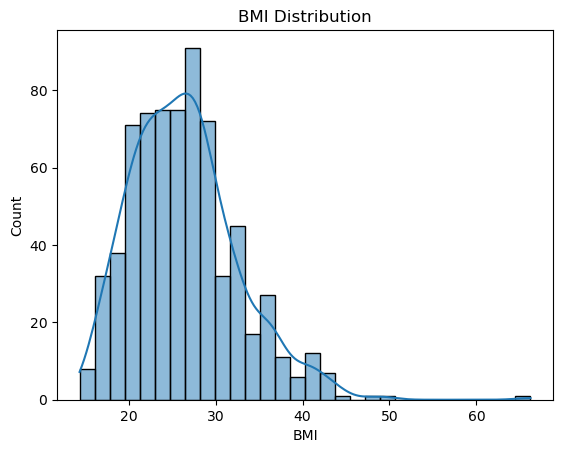

In [28]:
sns.histplot(merged_df['BMI'], kde=True)
plt.title("BMI Distribution")
plt.show()

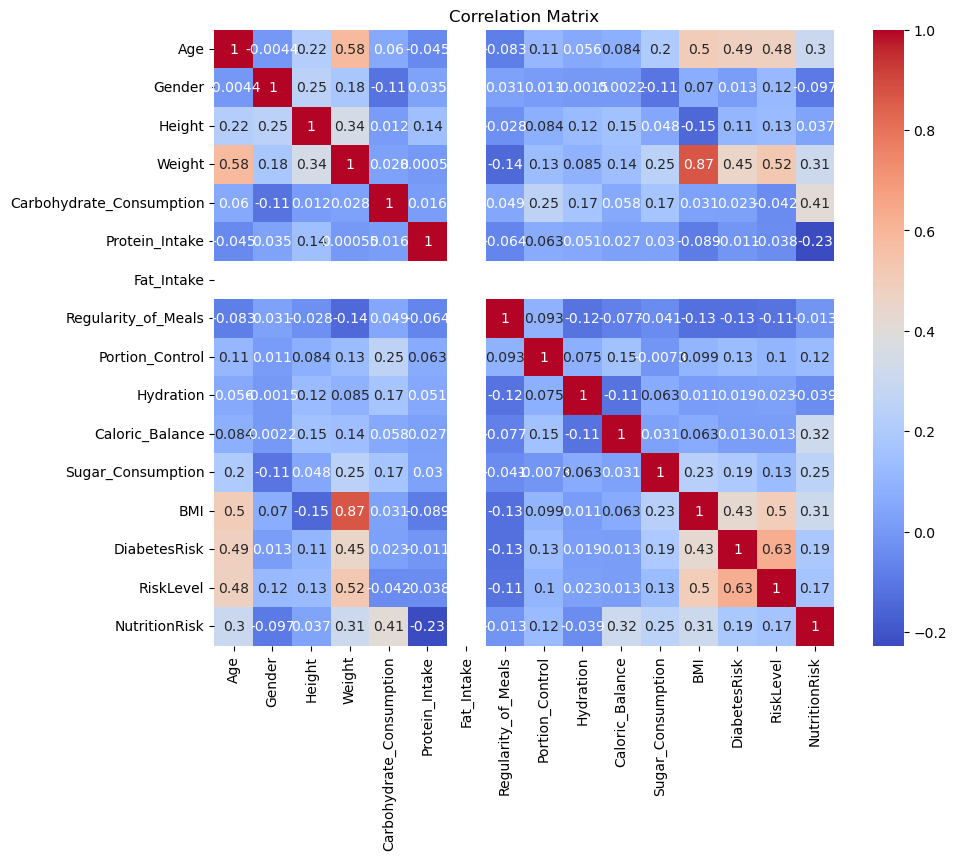

In [93]:
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


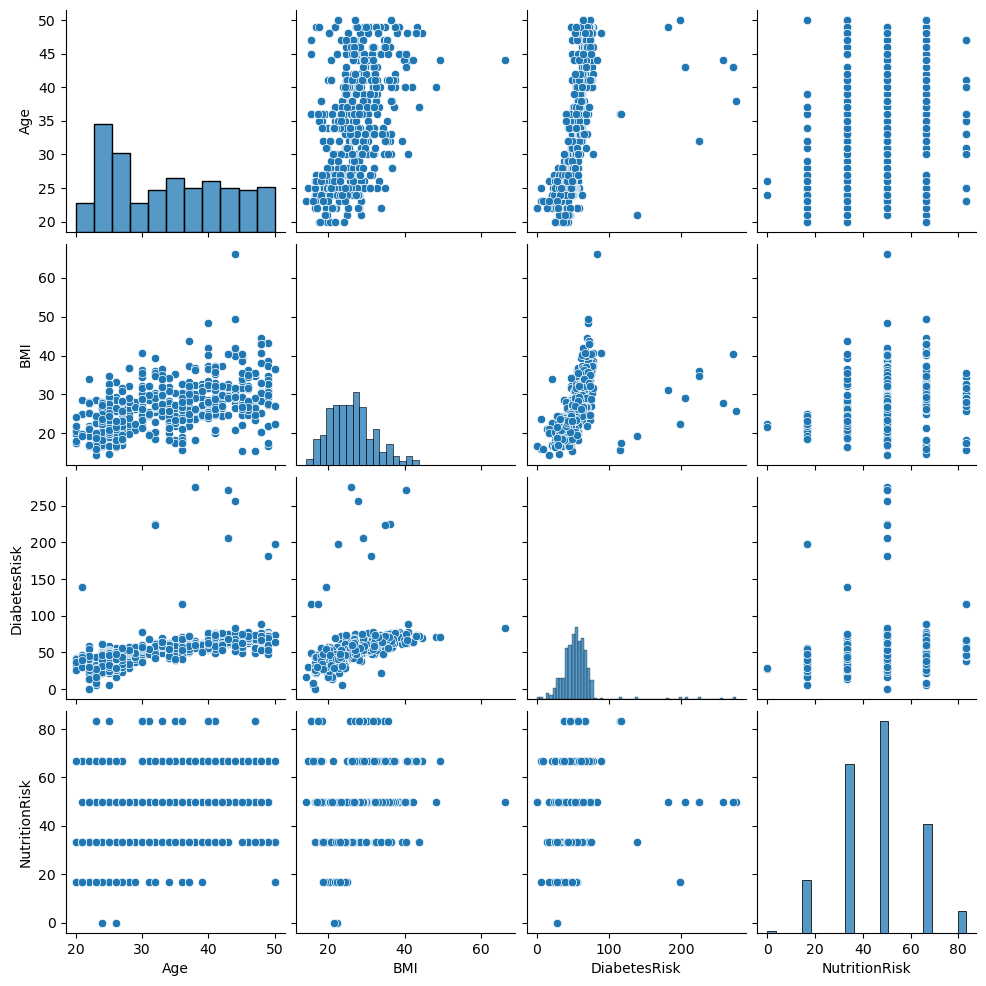

In [97]:
sns.pairplot(merged_df[['Age', 'BMI', 'DiabetesRisk', 'NutritionRisk']])
plt.show()


In [137]:
merged_df

,Age,Gender,Height,Weight,Carbohydrate_Consumption,Protein_Intake,Fat_Intake,Regularity_of_Meals,Portion_Control,Hydration,Caloric_Balance,Sugar_Consumption,BMI,DiabetesRisk,RiskLevel,NutritionRisk
0,24,1,167.0,50.0,2,1,1.0,1,1,2,2292.832359,1,17.928215,30.774236,1,66.666667
1,30,1,164.0,60.0,3,1,1.0,0,2,3,2292.832359,2,22.308150,42.784055,1,50.000000
2,24,1,165.0,55.0,1,2,1.0,0,1,1,2292.832359,1,20.202020,32.703477,1,33.333333
3,28,0,153.0,48.0,3,3,1.0,0,2,2,2292.832359,1,20.504934,28.756909,0,16.666667
4,24,0,163.0,56.0,2,1,1.0,1,3,5,1500.000000,2,21.077195,37.049640,1,33.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,42,1,178.0,85.3,5,3,1.0,1,3,3,2292.832359,2,26.922106,52.574598,1,50.000000
693,27,1,174.0,70.0,3,4,NaN,0,3,4,2292.832359,3,23.120624,42.968195,1,33.333333
694,45,1,177.0,84.2,3,4,1.0,0,3,2,2500.000000,1,26.876057,63.154794,1,50.000000
695,26,1,166.3,64.0,1,3,1.0,1,3,4,2292.832359,1,23.141712,48.052390,1,16.666667


#### Nutrition data set Augmentation

In [31]:
import pandas as pd
import numpy as np

# Drop missing values if any
merged_df = merged_df.dropna()

# Ensure valid types
merged_df['Age'] = merged_df['Age'].round().astype(int).clip(lower=0)
merged_df['BMI'] = merged_df['BMI'].clip(lower=0)
merged_df['DiabetesRisk'] = merged_df['DiabetesRisk'].clip(0, 100)

# Ensure Gender and RiskLevel are binary/integer and clipped
merged_df['Gender'] = merged_df['Gender'].round().clip(0, 1).astype(int)

# --- Augmentation Functions ---

# Add noise, excluding protected fields
def add_noise(df, noise_factor=0.01):
    df_noisy = df.copy()
    for column in df_noisy.select_dtypes(include=[np.number]).columns:
        if column in ['Age', 'DiabetesRisk', 'Gender', ]:
            continue
        noise = noise_factor * np.random.normal(size=df_noisy[column].shape)
        df_noisy[column] += noise
        df_noisy[column] = df_noisy[column].clip(lower=0)
    return df_noisy

# Apply random scaling, excluding protected fields
def apply_random_scaling(df, scale_factor_range=(0.9, 1.1)):
    df_scaled = df.copy()
    for column in df_scaled.select_dtypes(include=[np.number]).columns:
        if column in ['Age', 'DiabetesRisk', 'Gender', ]:
            continue
        scale_factor = np.random.uniform(*scale_factor_range)
        df_scaled[column] *= scale_factor
        df_scaled[column] = df_scaled[column].clip(lower=0)
    return df_scaled

# Age-based augmentation
def add_noise_by_age_group(df, noise_factor=0.01, augmentation_factor=2):
    age_groups = [(20, 30), (30, 40), (40, 50)]
    augmented_df = pd.DataFrame()

    for age_min, age_max in age_groups:
        group_df = df[(df['Age'] >= age_min) & (df['Age'] < age_max)]
        for _ in range(augmentation_factor):
            noisy_df = add_noise(group_df, noise_factor)
            scaled_df = apply_random_scaling(noisy_df)

            # Restore categorical fields
            for col in ['Age', 'Gender', 'DiabetesRisk', ]:
                scaled_df[col] = group_df[col].values

            augmented_df = pd.concat([augmented_df, scaled_df], ignore_index=True)

    return augmented_df

# Apply augmentation
nutrition_augmented_df = add_noise_by_age_group(merged_df, noise_factor=0.01, augmentation_factor=3)

# Final validations
nutrition_augmented_df['Age'] = nutrition_augmented_df['Age'].round().astype(int).clip(lower=0)
nutrition_augmented_df['Gender'] = nutrition_augmented_df['Gender'].round().clip(0, 1).astype(int)
nutrition_augmented_df['DiabetesRisk'] = nutrition_augmented_df['DiabetesRisk'].clip(0, 100)

# Dataset sizes
print("Original nutrition dataset size:", merged_df.shape)
print("Augmented nutrition dataset size:", nutrition_augmented_df.shape)


Original nutrition dataset size: (359, 15)
Augmented nutrition dataset size: (1062, 15)


In [32]:
nutrition_augmented_df.head()

,Age,Gender,Height,Weight,Carbohydrate_Consumption,Protein_Intake,Fat_Intake,Regularity_of_Meals,Portion_Control,Hydration,Caloric_Balance,Sugar_Consumption,BMI,DiabetesRisk,NutritionRisk
0,24,1,161.609263,48.731866,1.852525,1.090620,0.916151,0.959783,1.083803,2.043815,2120.952023,1.061643,17.093053,30.774236,66.860735
1,24,1,159.653670,53.637920,0.933021,2.175717,0.904236,0.008224,1.065243,1.038885,2120.958294,1.052971,19.227524,32.703477,33.419361
2,28,0,148.049594,46.770525,2.773378,3.266809,0.920246,0.000000,2.150421,2.047019,2120.920320,1.051036,19.532064,28.756909,16.708769
3,24,0,157.719943,54.580482,1.856103,1.071392,0.915962,0.960743,3.224980,5.128280,1387.532090,2.099957,20.091964,37.049640,33.412868
4,22,0,149.030373,44.849854,1.855097,1.116779,0.916990,0.950166,2.145013,3.079390,2120.942655,3.180002,18.476682,24.567752,16.712636


In [33]:
nutrition_augmented_df.to_csv("../../data/preproccedData/Augmented_PreProccedNutrationParameters.csv", index=False)